<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

with open(file="estados-bruto.xml", mode="r") as arquivo:
    conteudo = arquivo.read()

fonte = BeautifulSoup(conteudo, "lxml")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [2]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [3]:
# manipule os dados

estados = fonte.find_all("estado")

for estado in estados:
    ESTADO = estado.nome.text.strip()
    SIGLA = estado.sigla.text.strip()
    REGIAO = estado.regiao.text.strip()


In [4]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import csv

with open("estados-limpo.csv", mode="w", newline="") as arquivo:
    writer = csv.writer(arquivo, delimiter=";")
    writer.writerow(["Estado", "Sigla", "Região"])

    for estado in fonte.find_all("estado"):
        ESTADO = estado.nome.text.strip()
        SIGLA = estado.sigla.text.strip()
        REGIAO = estado.regiao.text.strip()
        writer.writerow([ESTADO, SIGLA, REGIAO])

### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [5]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

fonte = pd.read_csv("cidades-bruto.csv", sep=",")

In [6]:
# visualize os resultados

fonte

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [7]:
# Filtrando dados apenas do censo 2010

fonte = fonte[fonte["Censo"] == 2010]

In [8]:
# manipule os dados

# Extrair: estado, cidade, populacao, pib, pib_percapita

conteudo_extraido = fonte[["UF", "nome", "PIB", "Pop_est_2009", "PIB_percapita"]]
conteudo_extraido

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [9]:
# Renomeando algumas colunas selecionadas

conteudo_extraido.rename(columns={"UF": "Estado",
                                  "nome": "Cidade",
                                  "Pop_est_2009": "População"}, inplace=True) # inplace = True para salvar definitivamente a edição das colunas na variável conteudo extraído

/var/folders/5j/1xl9_4g17_s_rk9dswvp3d7m0000gn/T/ipykernel_1983/2052223293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conteudo_extraido.rename(columns={"UF": "Estado",


In [10]:
# Utilizando nova variável cidades_df 

cidades_df = conteudo_extraido.to_csv("cidades-limpo.csv", sep=";", index=False)
cidades_df

In [11]:
# Escrever o conteúdo extraido no arquivo cidades-limpo.csv separados por ;

import csv

with open(file="cidades-limpo.csv", mode="w", newline="") as arquivo:
    writer = csv.writer(arquivo, delimiter=";")
    conteudo_extraido.to_csv("cidades-limpo.csv", sep=";", index=False)

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [12]:
estados_df = pd.read_csv("estados-limpo.csv", sep=";") # salvando o arquivo em csv
estados_df

,Estado,Sigla,Região
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE
5,CEARA,CE,NORDESTE
6,DISTRITO FEDERAL,DF,CENTRO-OESTE
7,ESPIRITO SANTO,ES,SUDESTE
8,GOIAS,GO,CENTRO-OESTE
9,MARANHAO,MA,NORDESTE


In [13]:
# Utilizando acentos no df estados

estados_df["Estado"] = estados_df["Estado"].replace({ 
                                                     "AMAPA": "AMAPÁ",
                                                     "CEARA": "CEARÁ",
                                                     
                                                     "GOIAS": "GOIÁS",
                                                     "MARANHAO": "MARANHÃO",
                                                     "PARA": "PARÁ",
                                                      "PARAIBA": "PARAÍBA",
                                                       "PIAUI": "PIAUÍ",
                                                       "RONDONIA": "RONDÔNIA",
                                                       "PARANA": "PARANÁ",
                                                       "SAO PAULO": "SÃO PAULO"
                                                       })
estados_df

,Estado,Sigla,Região
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPÁ,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE
5,CEARÁ,CE,NORDESTE
6,DISTRITO FEDERAL,DF,CENTRO-OESTE
7,ESPIRITO SANTO,ES,SUDESTE
8,GOIÁS,GO,CENTRO-OESTE
9,MARANHÃO,MA,NORDESTE


In [14]:
estados_df["Estado"].unique()

array(['ACRE', 'ALAGOAS', 'AMAPÁ', 'AMAZONAS', 'BAHIA', 'CEARÁ',
       'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIÁS', 'MARANHÃO',
       'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARÁ', 'PARAÍBA', 'PARANÁ',
       'PERNAMBUCO', 'PIAUÍ', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE',
       'RIO GRANDE DO SUL', 'RONDÔNIA', 'RORAIMA', 'SANTA CATARINA',
       'SÃO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS'], dtype=object)

In [15]:
# Salvando as alterações no CSV

estados_df.to_csv("estados-limpo.csv", sep=";", index=False)

In [16]:
# solução do exercício 1.3 

import pandas as pd

estados_df = pd.read_csv("estados-limpo.csv", sep=";")
cidades_df = pd.read_csv("cidades-limpo.csv", sep=";")

df = pd.concat([estados_df, cidades_df])
df

,Estado,Sigla,Região,Cidade,PIB,População,PIB_percapita
0,ACRE,AC,NORTE,NaN,NaN,NaN,NaN
1,ALAGOAS,AL,NORDESTE,NaN,NaN,NaN,NaN
2,AMAPÁ,AP,NORTE,NaN,NaN,NaN,NaN
3,AMAZONAS,AM,NORTE,NaN,NaN,NaN,NaN
4,BAHIA,BA,NORDESTE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5550,SANTA CATARINA,NaN,NaN,Campo Erê,187628.906250,9737.0,19269.679688
5551,PARANÁ,NaN,NaN,Planalto,138553.546875,13983.0,9908.709961
5552,SÃO PAULO,NaN,NaN,Guararapes,532019.125000,29639.0,17949.970703
5553,RIO GRANDE DO SUL,NaN,NaN,Barra do Guarita,21980.636719,3067.0,7166.819824


In [17]:
# Utilizando a funcao merge para combinacao das colunas

combinacao = pd.merge(left=estados_df, right=cidades_df, on="Estado", how="inner")
combinacao

,Estado,Sigla,Região,Cidade,PIB,População,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


In [18]:
combinacao.to_csv("brasil.csv", sep=";", index=False)
combinacao

,Estado,Sigla,Região,Cidade,PIB,População,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [19]:
brasil_df = pd.read_csv("brasil.csv", sep=";")
brasil_df

,Estado,Sigla,Região,Cidade,PIB,População,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [20]:
top_cidades = brasil_df.loc[:,["Cidade", "População"]] # filtrando as duas colunas
top_cidades.sort_values(by=["População"], ascending=False).head(10).reset_index(drop=True) # filtrando em ordem decrescente

,Cidade,População
0,São Paulo,11037593
1,Rio de Janeiro,6186710
2,Salvador,2998056
3,Brasília,2606885
4,Fortaleza,2505552
5,Belo Horizonte,2452617
6,Curitiba,1851215
7,Manaus,1738641
8,Recife,1561659
9,Belém,1437600


In [21]:
# Verificando o maior valor de "População" 

brasil_df[["População"]].max()

População    11037593
dtype: int64

In [22]:
# Extraindo o índice de maior valor de "População"

i = brasil_df[(brasil_df["População"] == brasil_df["População"].max())].index
i

Index([4403], dtype='int64')

In [23]:
# Encontrando o segundo maior valor de "População"
brasil_df["População"].drop(i).max()

6186710

In [24]:
# Redefinindo o Index

top_cidades.sort_values(by=["População"], ascending=False).head(10).reset_index(drop=True) # filtrando em ordem decrescente
top_cidades.index +=1

In [25]:
top_cidades

,Cidade,População
1,Marechal Thaumaturgo,14275
2,Senador Guiomard,19697
3,Assis Brasil,5662
4,Epitaciolândia,14224
5,Manoel Urbano,7505
...,...,...
5551,Nacip Raydan,3015
5552,Nova Ponte,12504
5553,São Gonçalo do Sapucaí,23627
5554,Barbacena,128572


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [26]:
# Criando a variável filtro p/ escolher as 3 colunas

filtro = brasil_df.loc[:,["Região", "Cidade", "PIB_percapita"]] 
filtro.sort_values(by=["PIB_percapita"], ascending=True)
filtro[filtro["Região"] == "NORDESTE"].head(5).reset_index(drop=True)

,Região,Cidade,PIB_percapita
0,NORDESTE,Dois Riachos,3131.989990
1,NORDESTE,Belém,3846.159912
2,NORDESTE,Santana do Mundaú,4330.470215
3,NORDESTE,Campo Alegre,3862.840088
4,NORDESTE,Passo de Camaragibe,4192.180176


In [27]:
# Aplicando os filtros na mesma linha de código

filtro = brasil_df.loc[:,["Região", "Cidade", "PIB_percapita"]] # criando a variável filtro p/ escolher as 3 colunas
filtro[filtro["Região"] == "NORDESTE"].sort_values(by=["PIB_percapita"], ascending=True).head(5).reset_index(drop=True)

,Região,Cidade,PIB_percapita
0,NORDESTE,São Vicente Ferrer,1929.969971
1,NORDESTE,Cajapió,2203.830078
2,NORDESTE,Dom Inocêncio,2358.239990
3,NORDESTE,Timbiras,2368.159912
4,NORDESTE,Axixá,2416.969971


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [28]:
maior_pib_sp = brasil_df.loc[:,["Estado", "Cidade", "PIB"]]
maior_pib_sp.sort_values(by=["Cidade", "PIB"], ascending=True)
maior_pib_sp[maior_pib_sp["Estado"] == "SÃO PAULO"].head(15).reset_index(drop=True)

,Estado,Cidade,PIB
0,SÃO PAULO,Itapeva,1.120700e+06
1,SÃO PAULO,Elisiário,5.229523e+04
2,SÃO PAULO,Guarujá,3.429098e+06
3,SÃO PAULO,Pedrinhas Paulista,7.588169e+04
4,SÃO PAULO,São Luís do Paraitinga,8.282717e+04
5,SÃO PAULO,Divinolândia,1.585774e+05
6,SÃO PAULO,Araraquara,4.193535e+06
7,SÃO PAULO,Itapevi,3.638207e+06
8,SÃO PAULO,Bastos,3.223173e+05
9,SÃO PAULO,Três Fronteiras,4.972709e+04


In [29]:
# Removendo a coluna cidade, inserindo em ordem decrescente

maior_pib_sp = brasil_df.loc[:,["Estado", "Cidade", "PIB"]]
maior_pib_sp[maior_pib_sp["Estado"] == "SÃO PAULO"].sort_values(by=["PIB"], ascending=False).head(15).reset_index(drop=True)

,Estado,Cidade,PIB
0,SÃO PAULO,São Paulo,389317152.0
1,SÃO PAULO,Guarulhos,32473828.0
2,SÃO PAULO,Campinas,31654720.0
3,SÃO PAULO,Osasco,31616452.0
4,SÃO PAULO,São Bernardo do Campo,28935768.0
5,SÃO PAULO,Barueri,26908070.0
6,SÃO PAULO,Santos,22546134.0
7,SÃO PAULO,São José dos Campos,22018042.0
8,SÃO PAULO,Jundiaí,16585137.0
9,SÃO PAULO,Santo André,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [30]:
pib_sc = brasil_df.loc[:,["Estado", "PIB"]]
pib_sc[pib_sc["Estado"] == "SANTA CATARINA"]
total = pib_sc["PIB"].sum()
total

3236161767.4887695

In [31]:
# Someando o PIB com o filtro da coluna Estado somente que são "SANTA CATARINA"
pib_sc = brasil_df.loc[:,["Estado", "PIB"]]
total = pib_sc[pib_sc["Estado"] == "SANTA CATARINA"]
total["PIB"].sum()

129806256.75195317

 - Qual é o população da região sul?

In [32]:
populacao_sul = brasil_df[brasil_df["Estado"].isin(["RIO GRANDE DO SUL", "SANTA CATARINA", "PARANÁ"])]
total_sul = populacao_sul["População"].sum()
total_sul.astype(float)

27719118.0

In [33]:
# Formatando inserindo vírgula

populacao_sul = brasil_df[brasil_df["Estado"].isin(["RIO GRANDE DO SUL", "SANTA CATARINA", "PARANÁ"])]
total_sul = populacao_sul["População"].sum()
"{:,}".format(total_sul.astype(float))

'27,719,118.0'

In [34]:
# Criando um DF com a soma de cada estado da região sul

populacao_sul.groupby("Estado")[["População"]].agg("sum")

,População
Estado,
PARANÁ,10686247
RIO GRANDE DO SUL,10914128
SANTA CATARINA,6118743


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [35]:
mgs = brasil_df[brasil_df["Estado"] == "MATO GROSSO DO SUL"]
media = mgs["PIB_percapita"].mean()
media

14458.896859975644

 - Qual é a população do Brasil?

In [36]:
brasil_df["População"].sum()

191176146

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [37]:
# Reinstalando o ipykernel

!Pip install ipykernel


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [38]:
# instalando nbformat

!pip install --upgrade nbformat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [39]:
# Instalando o pacote plotly

%pip install -U plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 5.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.16.1
    Uninstalling plotly-5.16.1:
      Successfully uninstalled plotly-5.16.1

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
# Instalando o pacote nbformat, porém o erro continua na hora de criar o gráfico de barras

pip install nbformat 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
# Filtrando as 10 cidades com menor população

menor_pop = brasil_df.sort_values("População", ascending=True)
menor_pop.loc[:,["Cidade", "População"]].head(10).reset_index(drop=True)

,Cidade,População
0,Borá,837
1,Serra da Saudade,890
2,Anhanguera,1018
3,Araguainha,1115
4,Nova Castilho,1122
5,Oliveira de Fátima,1129
6,Miguel Leão,1212
7,Cedro do Abaeté,1221
8,Parari,1266
9,Chapada de Areia,1273


<Axes: title={'center': 'As 10 cidades menos populosas no Brasil'}, ylabel='Cidade'>

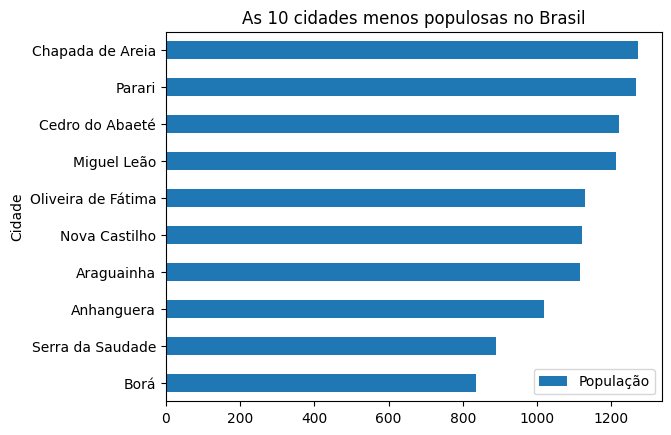

In [42]:
# Outra opção para gerar o gráfico de barras

menor_pop = brasil_df.sort_values("População", ascending=True)
menor_pop.loc[:,["Cidade", "População"]].head(10).reset_index(drop=True).plot.barh(x="Cidade", y="População", title="As 10 cidades menos populosas no Brasil")



In [43]:
import plotly.express as px

px.bar(menor_pop.head(10), x="Cidade", y="População")

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [44]:
populacao_e_regiao = brasil_df.loc[:,["Região", "População"]]
populacao_e_regiao

,Região,População
0,NORTE,14275
1,NORTE,19697
2,NORTE,5662
3,NORTE,14224
4,NORTE,7505
...,...,...
5550,SUDESTE,3015
5551,SUDESTE,12504
5552,SUDESTE,23627
5553,SUDESTE,128572


In [45]:
# Criando o gráfico de pizza com as duas colunas

px.pie(populacao_e_regiao, names="Região", values="População")